In [21]:
import numpy as np
import pandas as pd
import math

import tensorflow as tf
import tensorflow_datasets as tfds

from scipy.io import loadmat
from scipy.stats import chisquare
import scipy.cluster.hierarchy as hc

from sklearn import preprocessing
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from sklearn.cluster import AgglomerativeClustering, DBSCAN

import matplotlib.pyplot as plt

In [44]:
pine_gt = loadmat(r"C:\Users\DELL XPS\Downloads\data\Indian_pines_gt.mat")
pine_gt
pine_correct = loadmat(r"C:\Users\DELL XPS\Downloads\data\Indian_pines_corrected.mat")['indian_pines_corrected']
pine_correct

array([[[3172, 4142, 4506, ..., 1057, 1020, 1020],
        [2580, 4266, 4502, ..., 1064, 1029, 1020],
        [3687, 4266, 4421, ..., 1061, 1030, 1016],
        ...,
        [2570, 3890, 4320, ..., 1042, 1021, 1015],
        [3170, 4130, 4320, ..., 1054, 1024, 1020],
        [3172, 3890, 4316, ..., 1043, 1034, 1016]],

       [[2576, 4388, 4334, ..., 1047, 1030, 1006],
        [2747, 4264, 4592, ..., 1055, 1039, 1015],
        [2750, 4268, 4423, ..., 1047, 1026, 1015],
        ...,
        [3859, 4512, 4605, ..., 1056, 1035, 1015],
        [3686, 4264, 4690, ..., 1051, 1012, 1020],
        [2744, 4268, 4597, ..., 1047, 1019, 1016]],

       [[2744, 4146, 4416, ..., 1055, 1029, 1025],
        [2576, 4389, 4416, ..., 1051, 1021, 1011],
        [2744, 4273, 4420, ..., 1068, 1033, 1010],
        ...,
        [2570, 4266, 4509, ..., 1051, 1025, 1010],
        [2576, 4262, 4496, ..., 1047, 1029, 1020],
        [2742, 4142, 4230, ..., 1042, 1025, 1011]],

       ...,

       [[3324, 3728, 400

Downloaded the data (both the corrected dataset and the ground-truth dataset) into a subdirectory called data.

In [45]:
array = pine_gt['indian_pines_gt']
array

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [59]:
lb = LabelBinarizer()
X = array.reshape(145*145)
y = pine_correct.reshape((145*145,200))

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

 Created 17 binary classifiers using LabelBinarizer.

In [64]:
ys = lb.fit_transform(X)

In [16]:
def experiment(X,y, N=1500, solver='lbfgs',multi='auto'):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
    model = LogisticRegression(max_iter=N, solver=solver)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test,y_pred)

In [70]:
def experiment(X_train,X_test,y_train,y_test, N=1500,kernel='rbf',C=1.0):
    model = SVC(max_iter=N,kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test,y_pred)

In [74]:
X = array.reshape(145*145)
encoder = LabelBinarizer()
ys = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,ys,train_size=0.75)
experiment(X_train, X_test, y_train[:,0], y_test[:,0])

ValueError: Expected 2D array, got 1D array instead:
array=[14. 12. 11. ...  2.  0.  6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

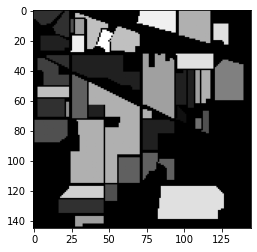

In [69]:
plt.imshow(array,cmap='gray')